# **Finding Correlation**
In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.

## Objectives
In this lab, you will perform the following:
- Identify the distribution of compensation data in the dataset.
- Remove outliers to refine the dataset.
- Identify correlations between various features in the dataset.

## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


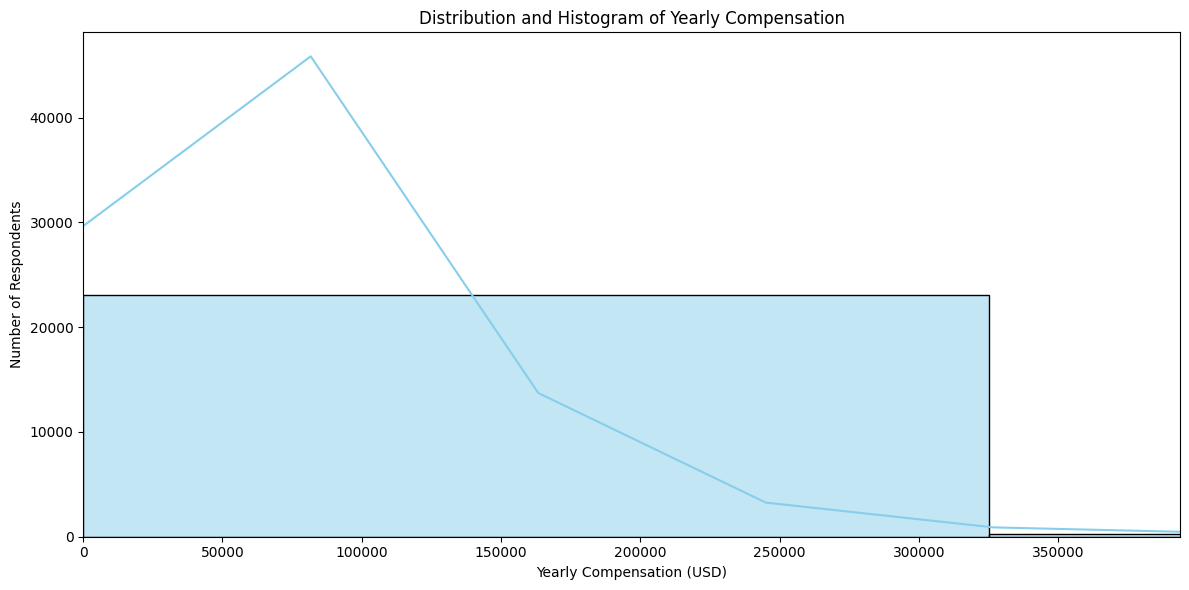

In [3]:
## Write your code here
# Ensure ConvertedCompYearly is numeric and drop missing values
comp = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce').dropna()

plt.figure(figsize=(12, 6))

# Histogram with KDE overlay
sns.histplot(comp, bins=50, kde=True, color='skyblue')

plt.title('Distribution and Histogram of Yearly Compensation')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.xlim(0, comp.quantile(0.99))  # Limit x-axis to 99th percentile for better visualization
plt.tight_layout()
plt.show()

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [4]:
## Write your code here
# Filter for full-time employed respondents and drop missing compensation values
fulltime_df = df[(df['Employment'] == 'Employed, full-time') & (df['ConvertedCompYearly'].notna())]

# Convert compensation to numeric (if needed)
fulltime_df['ConvertedCompYearly'] = pd.to_numeric(fulltime_df['ConvertedCompYearly'], errors='coerce')

# Calculate median compensation
median_compensation = fulltime_df['ConvertedCompYearly'].median()

print(f"Median yearly compensation for full-time employed respondents: ${median_compensation:,.2f}")

Median yearly compensation for full-time employed respondents: $69,814.00


C:\Users\Linh Huynh\AppData\Local\Temp\ipykernel_11664\1717369388.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fulltime_df['ConvertedCompYearly'] = pd.to_numeric(fulltime_df['ConvertedCompYearly'], errors='coerce')


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



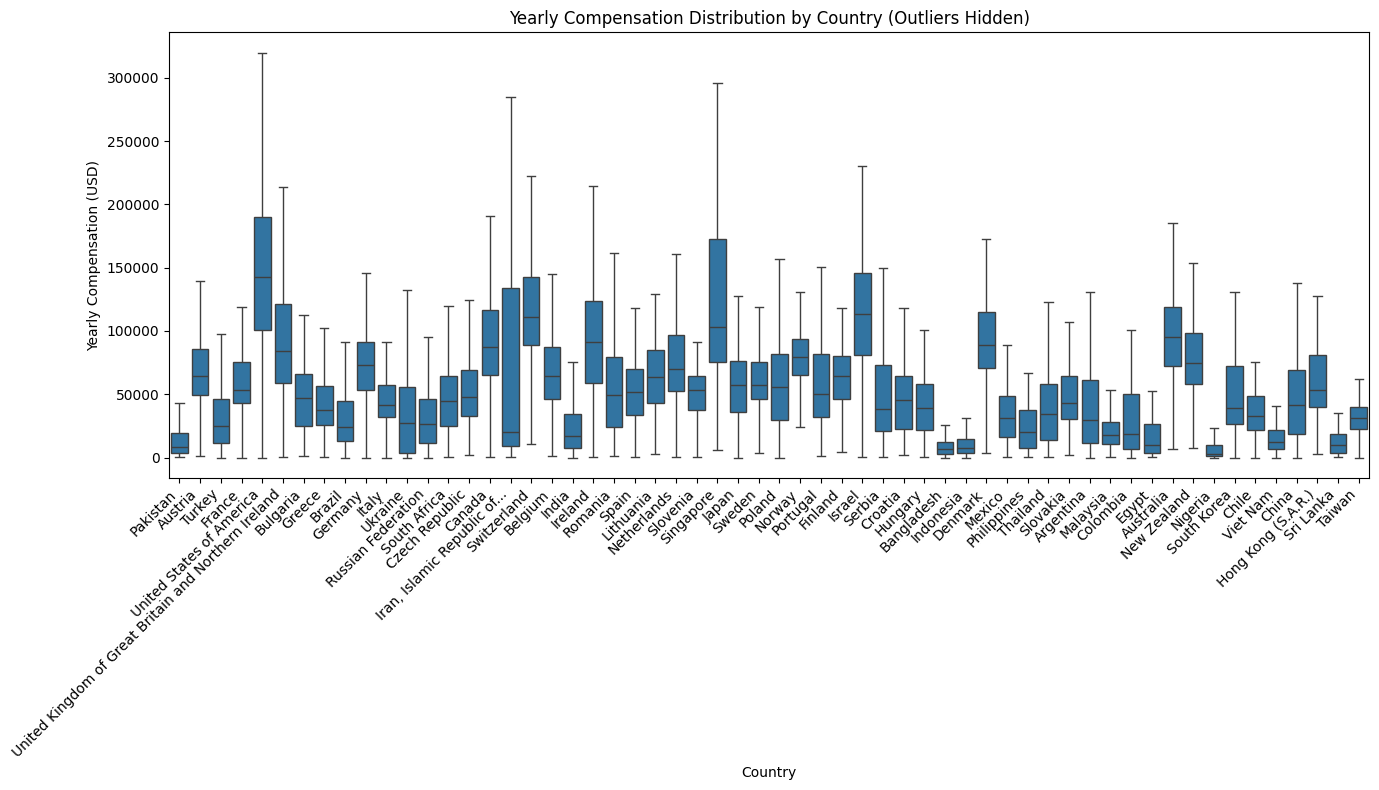

In [5]:
## Write your code here
# Keep rows with non-missing compensation and country
comp_country_df = df[['Country', 'ConvertedCompYearly']].dropna()

# Convert compensation to numeric
comp_country_df['ConvertedCompYearly'] = pd.to_numeric(comp_country_df['ConvertedCompYearly'], errors='coerce')
comp_country_df = comp_country_df.dropna()

# Optional: Filter countries with at least N respondents (e.g., 50) for clarity
country_counts = comp_country_df['Country'].value_counts()
top_countries = country_counts[country_counts >= 50].index
comp_country_df = comp_country_df[comp_country_df['Country'].isin(top_countries)]

plt.figure(figsize=(14, 8))
sns.boxplot(data=comp_country_df, x='Country', y='ConvertedCompYearly', showfliers=False)

plt.xticks(rotation=45, ha='right')
plt.title('Yearly Compensation Distribution by Country (Outliers Hidden)')
plt.ylabel('Yearly Compensation (USD)')
plt.xlabel('Country')
plt.tight_layout()
plt.show()

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [6]:
## Write your code here
# Convert to numeric and drop missing
comp = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce').dropna()

Q1 = comp.quantile(0.25)
Q3 = comp.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Keep only rows within bounds for ConvertedCompYearly
df_refined = df[
    (df['ConvertedCompYearly'] >= lower_bound) & 
    (df['ConvertedCompYearly'] <= upper_bound)
].copy()

print(f"Original dataset size: {df.shape[0]} rows")
print(f"Refined dataset size (outliers removed): {df_refined.shape[0]} rows")

Original dataset size: 65437 rows
Refined dataset size (outliers removed): 22457 rows


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


                     ConvertedCompYearly  YearsCodePro  JobSatPoints_1
ConvertedCompYearly             1.000000      0.154111        0.016261
YearsCodePro                    0.154111      1.000000       -0.033946
JobSatPoints_1                  0.016261     -0.033946        1.000000


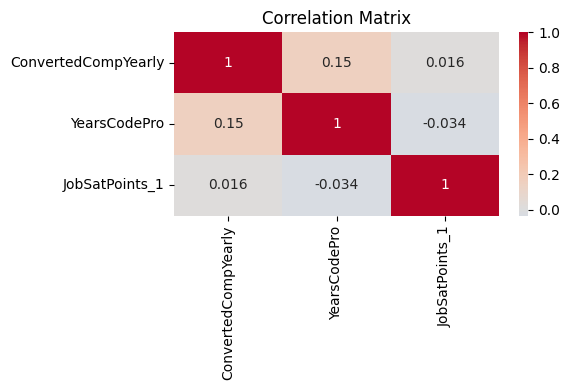

In [7]:
## Write your code here
# Select relevant columns and drop missing values
cols = ['ConvertedCompYearly', 'YearsCodePro', 'JobSatPoints_1']
df_corr = df[cols].copy()

# Convert to numeric and coerce errors (in case of strings)
for col in cols:
    df_corr[col] = pd.to_numeric(df_corr[col], errors='coerce')

# Drop rows with any missing values in these columns
df_corr = df_corr.dropna()

corr_matrix = df_corr.corr(method='pearson')  # or 'spearman' if preferred
print(corr_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


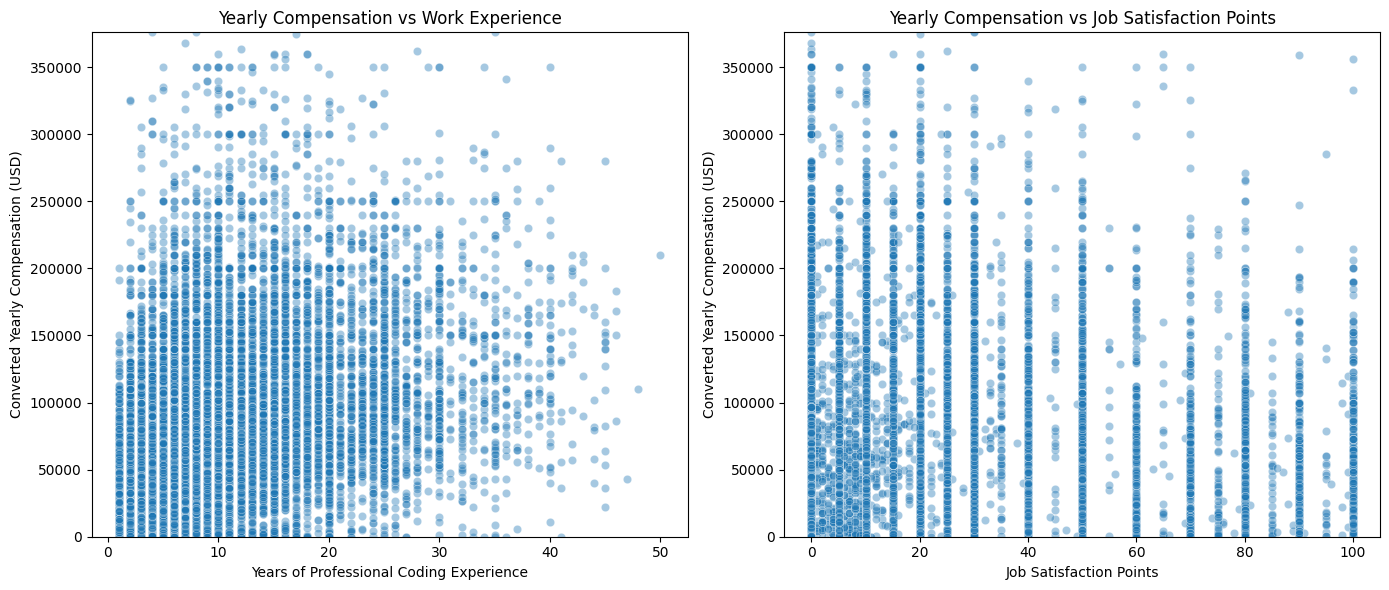

In [8]:
## Write your code here
# Select relevant columns
df_scatter = df[['ConvertedCompYearly', 'YearsCodePro', 'JobSatPoints_1']].copy()

# Convert columns to numeric, coerce errors
for col in ['ConvertedCompYearly', 'YearsCodePro', 'JobSatPoints_1']:
    df_scatter[col] = pd.to_numeric(df_scatter[col], errors='coerce')

# Drop rows with missing values
df_scatter = df_scatter.dropna()

plt.figure(figsize=(14, 6))

# Plot 1: ConvertedCompYearly vs YearsCodePro (Work Experience)
plt.subplot(1, 2, 1)
sns.scatterplot(x='YearsCodePro', y='ConvertedCompYearly', data=df_scatter, alpha=0.4)
plt.title('Yearly Compensation vs Work Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Converted Yearly Compensation (USD)')
plt.ylim(0, df_scatter['ConvertedCompYearly'].quantile(0.99))  # Limit y-axis for visibility

# Plot 2: ConvertedCompYearly vs JobSatPoints_1
plt.subplot(1, 2, 2)
sns.scatterplot(x='JobSatPoints_1', y='ConvertedCompYearly', data=df_scatter, alpha=0.4)
plt.title('Yearly Compensation vs Job Satisfaction Points')
plt.xlabel('Job Satisfaction Points')
plt.ylabel('Converted Yearly Compensation (USD)')
plt.ylim(0, df_scatter['ConvertedCompYearly'].quantile(0.99))  # Limit y-axis for visibility

plt.tight_layout()
plt.show()

## Summary
In this lab, you practiced essential skills in correlation analysis by:
- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.
By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.

Copyright © IBM Corporation. All rights reserved.
